<font size="5">Importing the Required Libraries.</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


- If you have not intsalled 
- pip install optuna
- pip install xgboost
- pip install catboost

**Importing the training and label data**

In [2]:
training = pd.read_csv('training_set_features.csv')

In [3]:
training.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
label = pd.read_csv('training_set_labels.csv')

In [5]:
label.shape

(26707, 3)

In [6]:
training.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

<font size="5"> Analysing Determinants of vaccination uptake </font> 

0 - Not taken the Vaccination 
<br>
1 - Taken the Vaccination

In [214]:
df = pd.read_csv('training_set_features.csv')

In [215]:
combined = pd.merge(df, label, on='respondent_id')

In [216]:
combined.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


**- Comparing respondents got Vaccination by SEX**

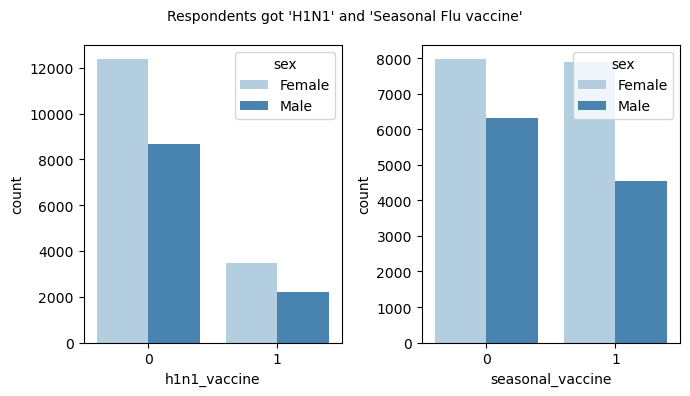

In [217]:
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

sns.countplot(x='h1n1_vaccine', data=combined, ax=axes[0], hue='sex', palette='Blues')
sns.countplot(x='seasonal_vaccine', data=combined, ax=axes[1], hue='sex',palette='Blues')

fig.subplots_adjust(wspace=0.6)

plt.suptitle("Respondents got 'H1N1' and 'Seasonal Flu vaccine'", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

**- Analysing whether chronic medical condition people took vaccination**

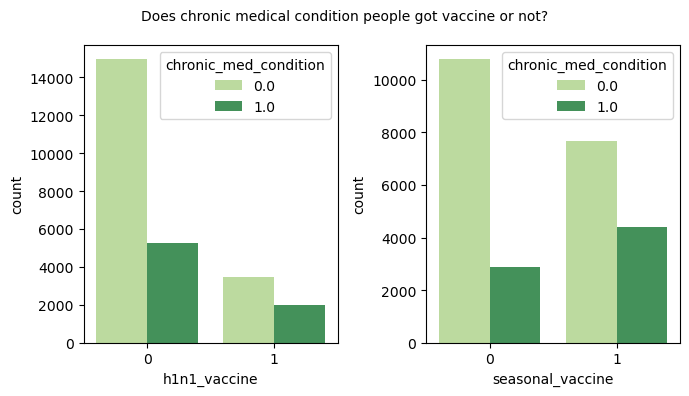

In [218]:
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

sns.countplot(x='h1n1_vaccine', data=combined, ax=axes[0], hue='chronic_med_condition', palette='YlGn')
sns.countplot(x='seasonal_vaccine', data=combined, ax=axes[1], hue='chronic_med_condition',palette='YlGn')

fig.subplots_adjust(wspace=0.6)

plt.suptitle("Does chronic medical condition people got vaccine or not?", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

**- Comparing Age Group and people took Vaccination**

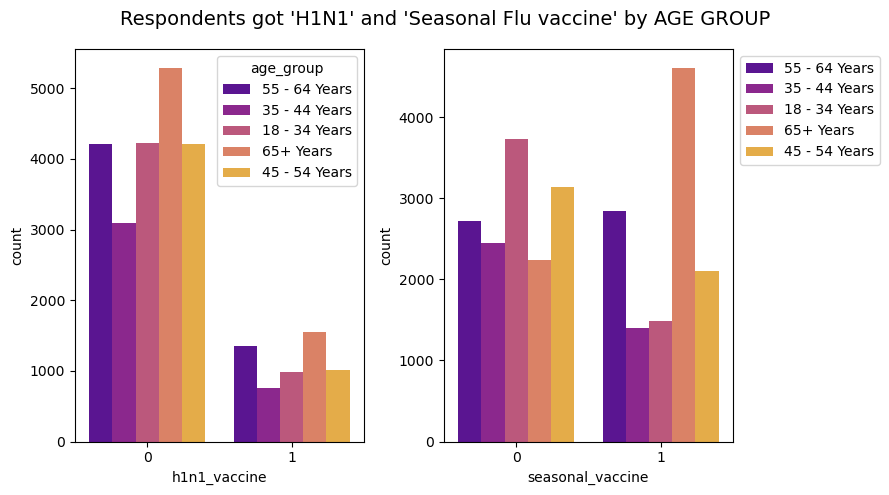

In [219]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 5))

sns.countplot(x='h1n1_vaccine', data=combined, ax=axes[0], hue='age_group', palette='plasma')
sns.countplot(x='seasonal_vaccine', data=combined, ax=axes[1], hue='age_group', palette='plasma')

fig.subplots_adjust(wspace=0.6)

plt.suptitle("Respondents got 'H1N1' and 'Seasonal Flu vaccine' by AGE GROUP", ha='center', fontsize=14)

handles, labels = axes[1].get_legend_handles_labels()

plt.legend(handles, labels, bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

**- Comparing Health Worker's vaccination status**

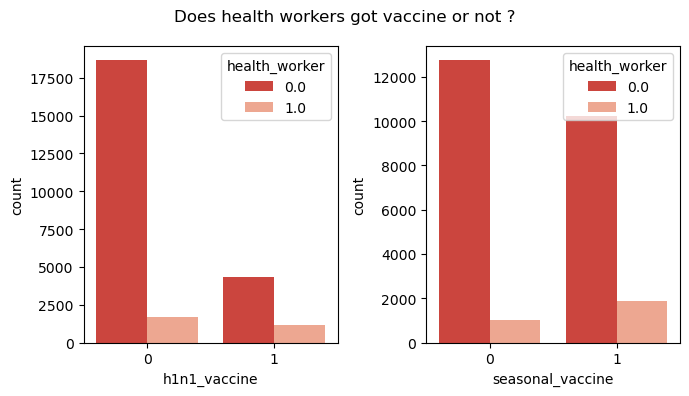

In [220]:
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

sns.countplot(x='h1n1_vaccine', data=combined, ax=axes[0], hue='health_worker', palette='Reds_r')
sns.countplot(x='seasonal_vaccine', data=combined, ax=axes[1], hue='health_worker',palette='Reds_r')

fig.subplots_adjust(wspace=0.6)

plt.suptitle("Does health workers got vaccine or not ?", ha='center')
plt.tight_layout()
plt.show()

**- Vaccination status based on people's concern and knowledge.**

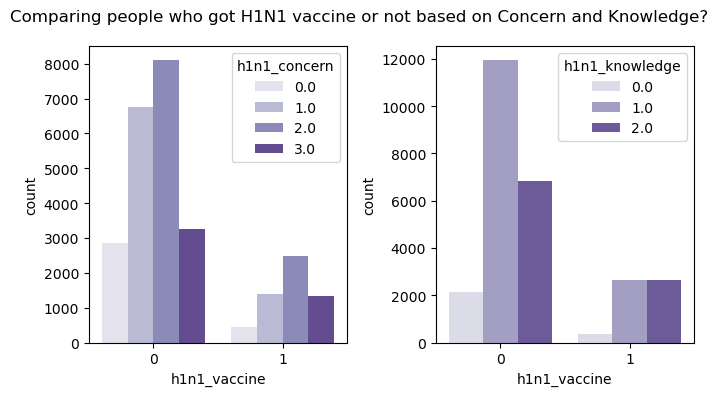

In [221]:
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

sns.countplot(x='h1n1_vaccine', data=combined, ax=axes[0], hue='h1n1_concern', palette='Purples')
sns.countplot(x='h1n1_vaccine', data=combined, ax=axes[1], hue='h1n1_knowledge',palette='Purples')

fig.subplots_adjust(wspace=0.6)

plt.suptitle("Comparing people who got H1N1 vaccine or not based on Concern and Knowledge?", ha='center')
plt.tight_layout()
plt.show()

**-Comparing people's opinion towards vaccine effectiveness and their vaccination status**

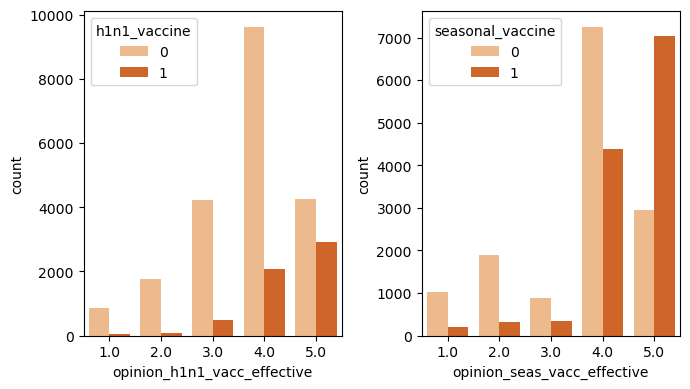

In [222]:
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

sns.countplot(x='opinion_h1n1_vacc_effective', data=combined, ax=axes[0], hue='h1n1_vaccine', palette='Oranges')
sns.countplot(x='opinion_seas_vacc_effective', data=combined, ax=axes[1], hue='seasonal_vaccine',palette='Oranges')

fig.subplots_adjust(wspace=0.6)

plt.tight_layout()
plt.show()

**- Checking whether Doctor's Recommendedation is Influencing respondents Vaccination status.**

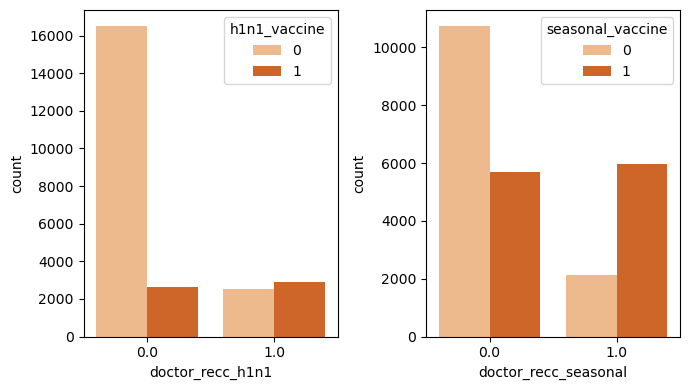

In [223]:
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

sns.countplot(x='doctor_recc_h1n1', data=combined, ax=axes[0], hue='h1n1_vaccine', palette='Oranges')
sns.countplot(x='doctor_recc_seasonal', data=combined, ax=axes[1], hue='seasonal_vaccine',palette='Oranges')

fig.subplots_adjust(wspace=0.6)

plt.tight_layout()
plt.show()

**- Comparing education level to the vaccination status**

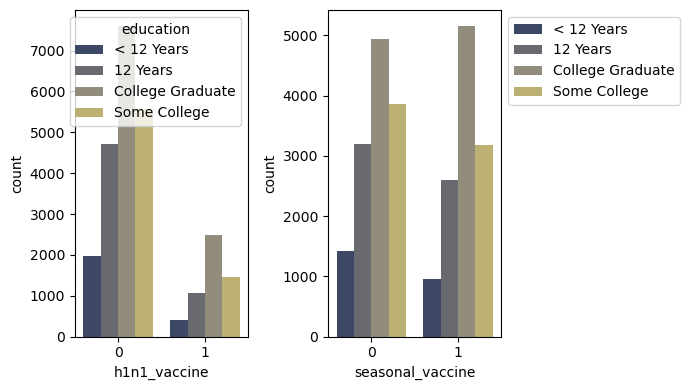

In [224]:
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

sns.countplot(hue='education', data=combined, ax=axes[0], x='h1n1_vaccine', palette='cividis')
sns.countplot(hue='education', data=combined, ax=axes[1], x='seasonal_vaccine',palette='cividis')

handles, labels = axes[1].get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(1, 1), loc='upper left')

fig.subplots_adjust(wspace=0.6)

plt.tight_layout()
plt.show()

In [225]:
h1_industry = px.histogram(combined, x='h1n1_vaccine', color='employment_industry',
                   barmode='group', histfunc='count', template='plotly_white',
                           
                  title="Total 'H1N1' Vaccination status Industry-wise")

h1_industry.show()

In [226]:
seas_industry = px.histogram(combined, x='seasonal_vaccine', color='employment_industry',
                   barmode='group', histfunc='count', template='plotly_white',
                             
                  title="Total 'Seasonal Flu' Vaccination status Industry-wise")

seas_industry.show()

In [227]:
h1_emp = px.histogram(combined, x='h1n1_vaccine', color='employment_occupation',
                   barmode='group', histfunc='count', template='plotly_white',
                      
                  title=" Total 'H1N1' Vaccination status Occupation-wise")

h1_emp.show()

In [228]:
seas_emp = px.histogram(combined, x='seasonal_vaccine', color='employment_occupation',
                   barmode='group', histfunc='count', template='plotly_white',
                  title=" Total 'Seasonal Flu' Vaccination status Occupation-wise")

seas_emp.show()

**- Comparing vaccination uptake over hhs_geo_region**

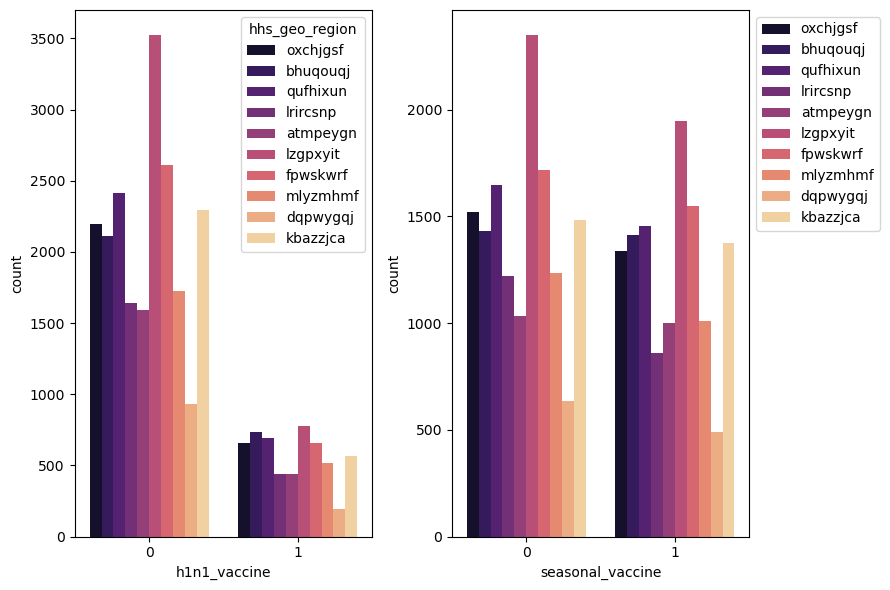

In [229]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 6))

sns.countplot(hue='hhs_geo_region', data=combined, ax=axes[0], x='h1n1_vaccine', palette='magma')
sns.countplot(hue='hhs_geo_region', data=combined, ax=axes[1], x='seasonal_vaccine',palette='magma',)

fig.subplots_adjust(wspace=0.6)

handles, labels = axes[1].get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

**- Comparing Census MSA over vaccination**

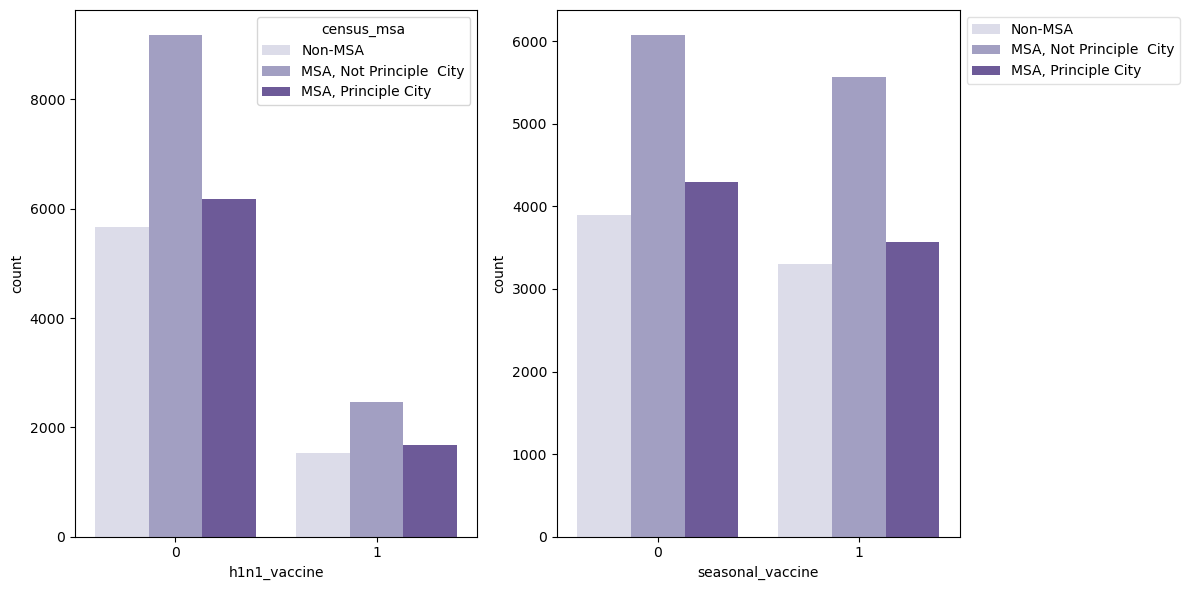

In [281]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

sns.countplot(hue='census_msa', data=combined, ax=axes[0], x='h1n1_vaccine', palette='Purples')
sns.countplot(hue='census_msa', data=combined, ax=axes[1], x='seasonal_vaccine',palette='Purples')

# handles, labels = axes[1].get_legend_handles_labels()
# plt.legend(handles, labels, bbox_to_anchor=(1, 1), loc='upper left')


fig.subplots_adjust(wspace=0.6)

plt.tight_layout()
 plt.show()

**- Comparing Income Poverty people over vaccination uptake**

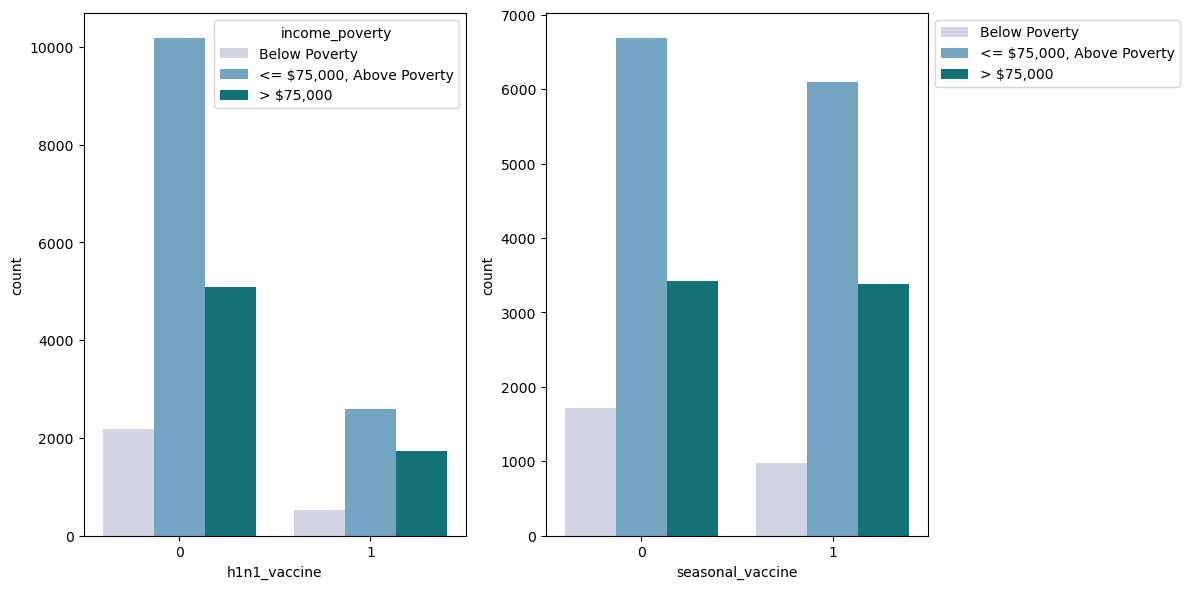

In [279]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

sns.countplot(hue='income_poverty', data=combined, ax=axes[0], x='h1n1_vaccine', palette='PuBuGn')
sns.countplot(hue='income_poverty', data=combined, ax=axes[1], x='seasonal_vaccine',palette='PuBuGn')

handles, labels = axes[1].get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(1, 1), loc='upper left')

fig.subplots_adjust(wspace=0.6)

plt.tight_layout()
plt.show()

**- Comparing the Employment Status over** 

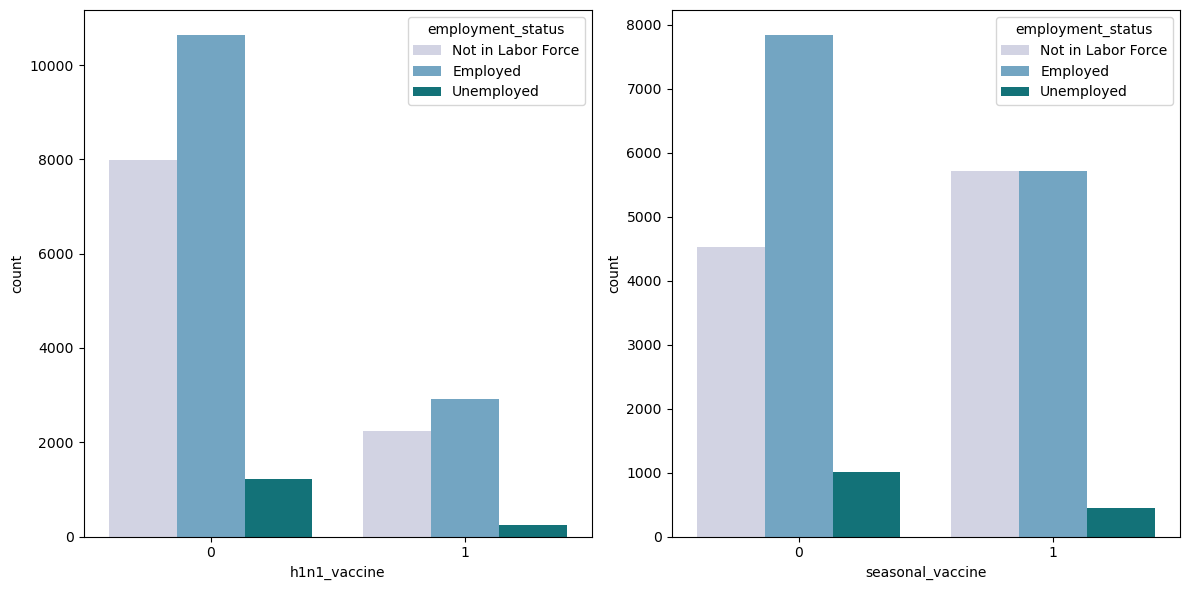

In [232]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

sns.countplot(hue='employment_status', data=combined, ax=axes[0], x='h1n1_vaccine', palette='PuBuGn')
sns.countplot(hue='employment_status', data=combined, ax=axes[1], x='seasonal_vaccine',palette='PuBuGn')

fig.subplots_adjust(wspace=0.6)

plt.tight_layout()
plt.show()